In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [74]:
df=pd.read_csv("heart_attack_prediction_dataset 2.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [78]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [80]:
df = df.drop(columns=['Patient ID'])
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [82]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,Male,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [84]:
df = df.drop(columns=['Blood Pressure'])
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [86]:
label_encoder = LabelEncoder()

# Encode Sex, Diet, Country, Continent, Hemisphere
for column in ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']:
    if column in df.columns: 
      df[column] = label_encoder.fit_transform(df[column])
    else:
      print(f"Warning: Column '{column}' not found in DataFrame.")
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91,88


In [88]:
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree Classifier': DecisionTreeClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

In [96]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'{name} accuracy: {accuracy}')

Logistic Regression accuracy: 0.645367412140575
Decision Tree Classifier accuracy: 0.5362848014605203
Random Forest Classifier accuracy: 0.6385212231857599


In [97]:
df['Stress Level'].value_counts()

Stress Level
2     913
4     910
7     903
9     887
8     879
3     868
1     865
5     860
6     855
10    823
Name: count, dtype: int64

In [98]:
df['Diabetes'].value_counts()

Diabetes
1    5716
0    3047
Name: count, dtype: int64

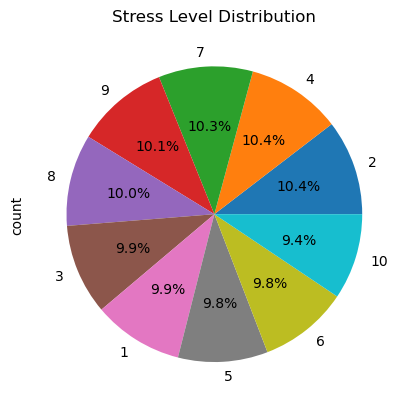

In [99]:
df['Stress Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Stress Level Distribution')
plt.savefig("Stress Level Distribution")
plt.show()

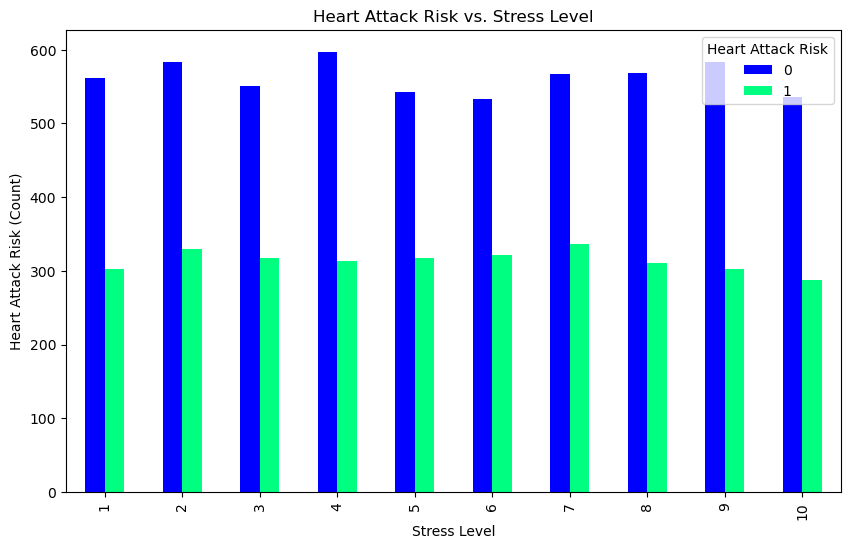

In [144]:
heart_by_stress = df.groupby('Stress Level')['Heart Attack Risk'].value_counts().unstack()

heart_by_stress.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs. Stress Level.png")
plt.show()

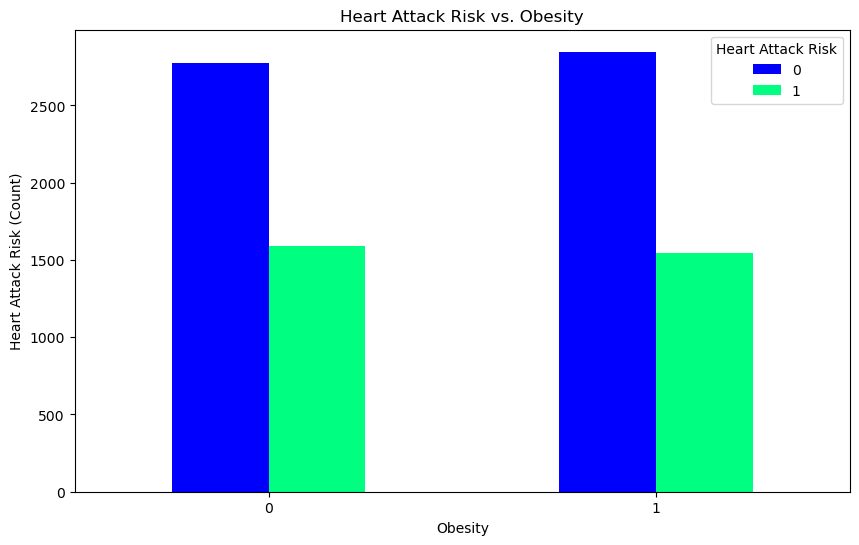

In [148]:
heart_by_obesity = df.groupby(['Obesity', 'Heart Attack Risk']).size().unstack()

heart_by_obesity.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Obesity')
plt.xlabel('Obesity')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs. Obesity.png")
plt.show()

In [150]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

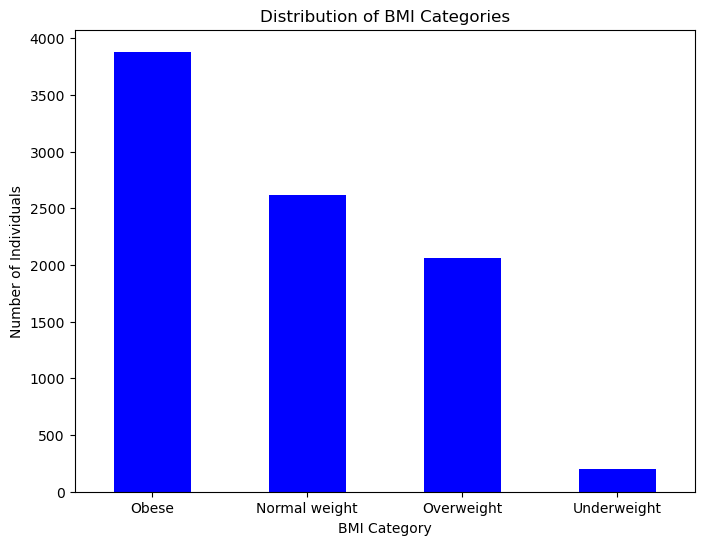

In [152]:
df['BMI Category'] = df['BMI'].apply(categorize_bmi)

bmi_category_counts = df['BMI Category'].value_counts()

plt.figure(figsize=(8, 6))
bmi_category_counts.plot(kind='bar', colormap='winter')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.savefig("BMI_Distribution.png")
plt.show()

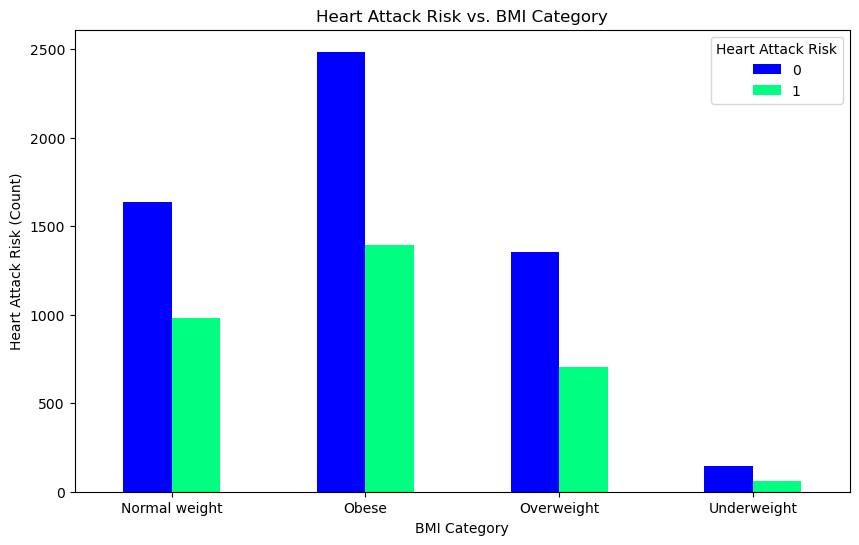

In [154]:
heart_attack_risk_by_bmi_category = df.groupby(['BMI Category', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_bmi_category.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs BMI.png")
plt.show()

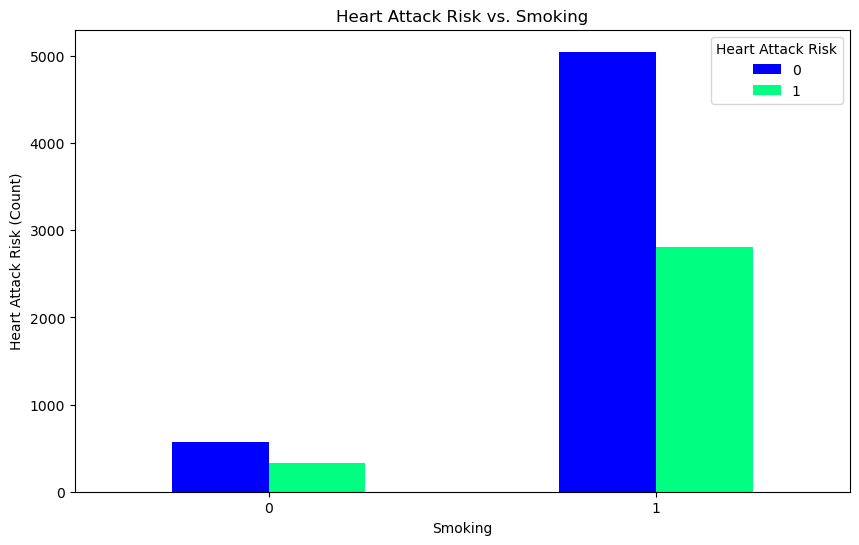

In [156]:
heart_attack_risk_by_smoking = df.groupby(['Smoking', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_smoking.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Smoking')
plt.xlabel('Smoking')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs Smokin.png")
plt.show()

In [126]:
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 110, 10), right=False)

age_group_counts = df.groupby('Age Group').size()

print(age_group_counts)

Age Group
[0, 10)         0
[10, 20)      251
[20, 30)     1251
[30, 40)     1225
[40, 50)     1201
[50, 60)     1156
[60, 70)     1203
[70, 80)     1134
[80, 90)     1190
[90, 100)     152
dtype: int64


/var/folders/_z/y17b_m151jb68st8bhhh9g_w0000gn/T/ipykernel_42876/276306992.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby('Age Group').size()


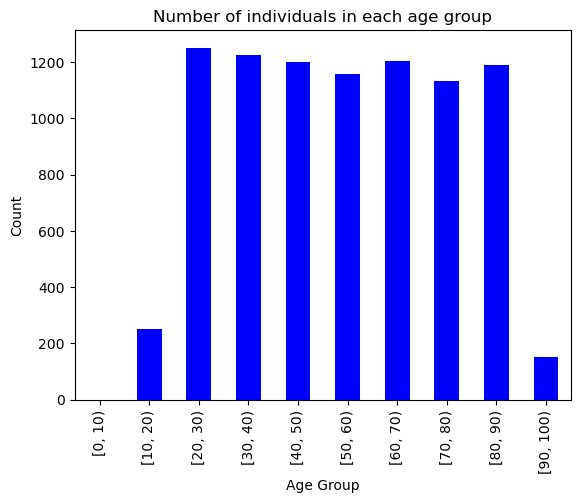

In [158]:
age_group_counts.plot(kind='bar', colormap='winter')
plt.title('Number of individuals in each age group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

/var/folders/_z/y17b_m151jb68st8bhhh9g_w0000gn/T/ipykernel_42876/612514775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_risk_by_age_group = df.groupby(['Age Group', 'Heart Attack Risk']).size().unstack(fill_value=0)


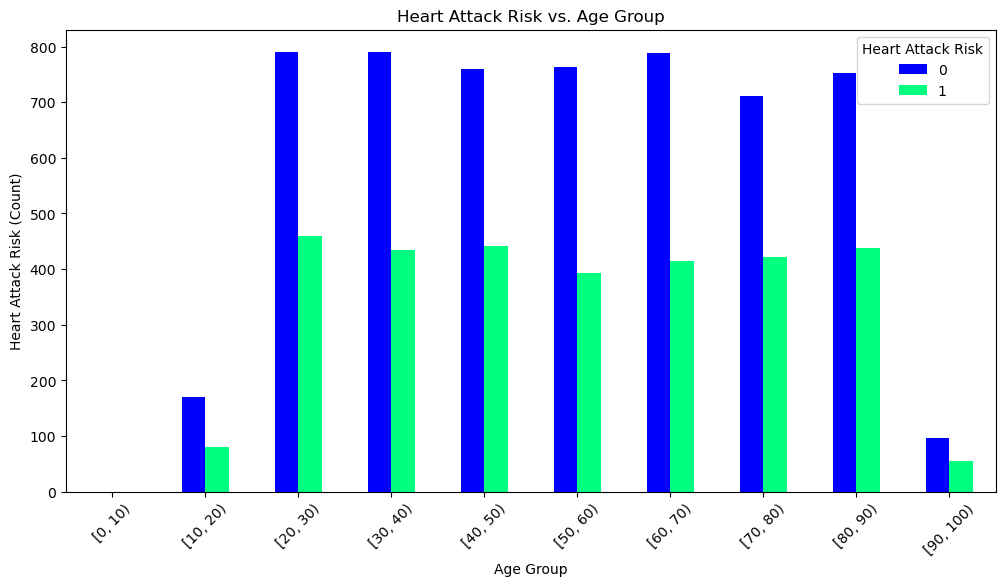

In [160]:
heart_attack_risk_by_age_group = df.groupby(['Age Group', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_age_group.plot(kind='bar', figsize=(12, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Risk (Count)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart_Attack_Risk_vs_Age_Group.png")
plt.show()